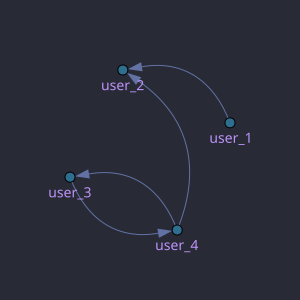

In [7]:
from typing import Tuple

import igraph as ig
from pydantic import BaseModel

class GraphPlotStyle(BaseModel):
    bbox: Tuple[int, int] = (300, 300)
    margin: int = 70
    vertex_size: int = 10
    vertex_label_dist: int = 2
    vertex_label_color: str = "#bd93f9"
    vertex_color: str = "#2E6E8E"
    background: str = "#282a36"
    edge_color: str = "#6272a4"
    edge_arrow_size: int = 1
    edge_arrow_width: int = 1
    edge_curved: bool = True
    layout: str = "auto"


graph = ig.Graph()
users = ["user_1", "user_2", "user_3", "user_4"]
for u in users:
    graph.add_vertex(u)
graph = graph.as_directed()
plot_style = GraphPlotStyle().model_dump()
plot_style["vertex_label"] = graph.vs["name"]
plot_style["layout"] = graph.layout("fr")


import random
e = []
for i in range(len(users)):
    for j in range(len(users)):
        if i != j:
            r = random.randint(0, 2)
            if r == 1:
                e.append((users[i], users[j]))

graph.add_edges(e)
cairoplot = ig.plot(graph, **plot_style)
cairoplot

In [10]:
df = {
    "source": [],
    "target": [],
    "source follow target?": []
}
for u_i in users:
    for u_j in users:
        if u_i != u_j:
            df["source"].append(u_i)
            df["target"].append(u_j)
            df["source follow target?"].append(graph.are_connected(u_i, u_j))

import pandas as pd
df = pd.DataFrame(df)
df

,source,target,source follow target?
0,user_1,user_2,True
1,user_1,user_3,False
2,user_1,user_4,False
3,user_2,user_1,False
4,user_2,user_3,False
5,user_2,user_4,False
6,user_3,user_1,False
7,user_3,user_2,False
8,user_3,user_4,True
9,user_4,user_1,False
